In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline

df_lis = pd.read_csv('listingsBOSTON.csv')


# Data Inspection 


In [2]:
#Below code gives information about the number of columns and number of rows.
df_lis.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df_lis.shape

(3585, 95)

In [4]:
list(df_lis.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [5]:
#Below code shows the data types and the number of these data types in the dataset
df_lis.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [6]:
df_lis.dtypes[df_lis.dtypes=='float64']

neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object

In [7]:
#Below code showa the name of the columns which are int64 data type
df_lis.dtypes[df_lis.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [8]:
##Below code shows the name of the columns which are object data type
pd.set_option('display.max_rows', 92)
df_lis.dtypes[df_lis.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_respon

In [9]:
#Below code shows the number of NaN in each column in descending order
df_lis.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
                                ... 
state                              0
neighbourhood_cleansed             0
street                             0
host_identity_verified             0
id                                 0
Length: 95, dtype: int64

In [10]:
#Column names that do not have any NaN values and all values are unique values
df_lis.nunique()[df_lis.nunique()==len(df_lis)]

id             3585
listing_url    3585
picture_url    3585
latitude       3585
longitude      3585
dtype: int64

In [11]:
#The below code shows the columns names that have some NaN values and number of unique values in that column
df_lis.nunique()[df_lis.nunique() != len(df_lis)].sort_values(ascending=False)

name                                3504
description                         3423
summary                             3113
amenities                           3092
thumbnail_url                       2986
medium_url                          2986
xl_picture_url                      2986
space                               2268
host_id                             2181
host_url                            2181
host_thumbnail_url                  2174
host_picture_url                    2174
house_rules                         1928
transit                             1859
access                              1762
neighborhood_overview               1728
interaction                         1617
host_name                           1334
host_since                          1281
notes                               1269
host_about                          1240
street                              1239
first_review                         975
reviews_per_month                    644
last_review     

In [12]:
#list of columns name with NaN values
df_lis.columns[df_lis.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode',
       'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'has_availability', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

In [13]:
#number of NaN in each column in descending order
df_lis.isnull().sum().sort_values(ascending=False)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
                                ... 
state                              0
neighbourhood_cleansed             0
street                             0
host_identity_verified             0
id                                 0
Length: 95, dtype: int64

In [14]:
#which colums have no NaN - this provides a set of column names that have no NaN
np.sum(df_lis.isnull())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [15]:
#set of columns that have NO MISSING values
no_nulls = set(df_lis.columns[np.sum(df_lis.isnull()) == 0])
print(no_nulls)

{'experiences_offered', 'latitude', 'guests_included', 'extra_people', 'room_type', 'listing_url', 'id', 'last_scraped', 'host_total_listings_count', 'name', 'description', 'neighbourhood_cleansed', 'is_location_exact', 'availability_60', 'require_guest_profile_picture', 'host_identity_verified', 'instant_bookable', 'street', 'host_verifications', 'availability_30', 'host_has_profile_pic', 'host_is_superhost', 'host_thumbnail_url', 'calculated_host_listings_count', 'longitude', 'host_name', 'host_picture_url', 'host_url', 'picture_url', 'price', 'accommodates', 'smart_location', 'maximum_nights', 'host_listings_count', 'calendar_last_scraped', 'amenities', 'country', 'bed_type', 'calendar_updated', 'host_since', 'number_of_reviews', 'host_id', 'require_guest_phone_verification', 'cancellation_policy', 'scrape_id', 'state', 'availability_90', 'country_code', 'minimum_nights', 'requires_license', 'availability_365'}


In [16]:
#what columns have NaN? True  = have missing values
np.sum(df_lis.isnull()) == 0

id                                   True
listing_url                          True
scrape_id                            True
last_scraped                         True
name                                 True
                                    ...  
cancellation_policy                  True
require_guest_profile_picture        True
require_guest_phone_verification     True
calculated_host_listings_count       True
reviews_per_month                   False
Length: 95, dtype: bool

In [17]:
#Code below shows set of columns with more than 75% of the values missing
#Label True on columns where missing values are more than 75%
np.sum(df_lis.isnull())/df_lis.shape[0] > .75

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                   False
Length: 95, dtype: bool

In [18]:
#2.Code below makes a list of columns with more than 75% of missing values 
df_lis.columns[np.sum(df_lis.isnull())/df_lis.shape[0]>.75]

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'has_availability', 'license', 'jurisdiction_names'],
      dtype='object')

# Question 1: What are the most common property type and room type in Boston?

In [19]:
#Below code shows the property types and counts how many listings are under each type
df_lis['property_type'].value_counts().sort_values(ascending=False)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [20]:
#Below code shows the room types and counts how many listings are under each type
df_lis['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

# Question 1.1: Popularity of Property and Room Type 

Here we want to see the impact of property_type and room_type on future bookings.  Availability in the next 30 days will be an indicator of property and room popularity.


In [21]:
#We first check NaN in the availability_30 
df_lis['availability_30'].isnull().sum()

0

In [22]:
#We create a new column from availability_30, which will tell us what is the percentage of days booked  
# out of the next 30 days for each property
df_lis['booking_percentage_30'] = 1 - (df_lis['availability_30']/30)
df_lis['booking_percentage_30'].head()

0    1.000000
1    0.133333
2    0.366667
3    0.800000
4    0.566667
Name: booking_percentage_30, dtype: float64

Above, we found the percantage of days booked out of the next 30 days for each listing. We will use 'booking_percentage_30' as a new variable of popularity. 

Now, we will use our new 'booking_percentage_30' to investige how room type and property type attract bookings. 

First, we will investigate room_type.

In [23]:
#Below code shows information about booking percentages of different room types for next 30 days
df_lis.groupby(['room_type'])['booking_percentage_30'].mean().sort_values(ascending=False)

room_type
Private room       0.739332
Entire home/apt    0.699091
Shared room        0.569583
Name: booking_percentage_30, dtype: float64

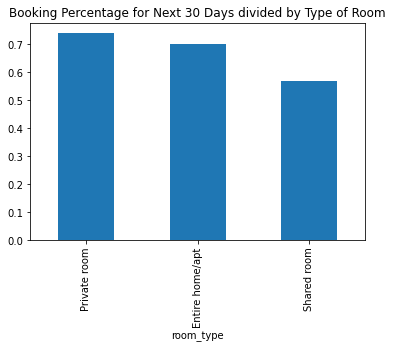

In [24]:
#Below code plots a bar chart to visualize booking ratios of different room types for next 30 days
(df_lis.groupby(['room_type'])['booking_percentage_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Percentage for Next 30 Days divided by Type of Room');
plt.show()

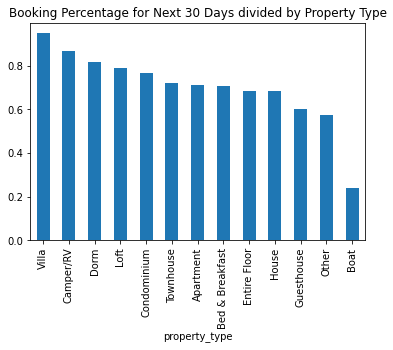

In [25]:
#Below code plots a bar chart to visualize booking ratios of different room types for next 30 days
(df_lis.groupby(['property_type'])['booking_percentage_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Percentage for Next 30 Days divided by Property Type');
plt.show()

As seen above, some property types have verw few listings as opposed to Apartment, House, Condominium. A type property such as "Villa" that has only 6 listings might have easily a higher booking percentage as opposed to "Apartment", having 2612 listings. Therefore, we conclude that Boats, with 12 listings, are less popular than Villa, with only 6 listings. Apartments, with 2612 listings, are almost as much popular as B&B, with 41 listings. 


# Question 2: What are the most common ameneties that are available in the Airbnb Boston dataset? 

Besides the information provived by the columns, the column 'amenities'provides further detailed information about the properties, such as a kitchen, wifi, washer/dryer etc. 

We would like to know what are the most popular amenities across the listings, and later select some of them to predict the price of listings. 


In [26]:
#We first create an empty list to fill with amenities available.
list_of_amenities = []

#We create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_amenities.append(df_lis['amenities'][i])
        

In [27]:
#Each listing in the dataset has a unique set of amenities. The set function will make the amenities unique 
# and convert such set into a list. 
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

In [28]:
#Now list the list of amenties is an empty string, so we remove it 
#from the list
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

In [29]:
print(list_of_amenities)

['"Cable TV"', '"Washer / Dryer"', '"Fire Extinguisher"', '"24-Hour Check-in"', '"Buzzer/Wireless Intercom"', 'Breakfast', '"Safety Card"', '"Air Conditioning"', 'Cat(s)', '"Laptop Friendly Workspace"', 'Pool', 'Kitchen', '"Elevator in Building"', '"Wireless Internet"', 'Heating', '"Indoor Fireplace"', '"First Aid Kit"', '"translation missing: en.hosting_amenity_49"', '"Hot Tub"', '"Wheelchair Accessible"', '"Smoking Allowed"', 'Iron', '"Hair Dryer"', '"translation missing: en.hosting_amenity_50"', '"Lock on Bedroom Door"', 'Dryer', '"Free Parking on Premises"', '"Smoke Detector"', '"Suitable for Events"', 'Gym', '"Other pet(s)"', 'Dog(s)', '"Family/Kid Friendly"', 'Internet', '"Pets live on this property"', '"Paid Parking Off Premises"', '"Free Parking on Street"', 'Doorman', 'Hangers', 'TV', 'Essentials', '"Carbon Monoxide Detector"', '"Pets Allowed"', 'Shampoo', 'Washer']


The code in the below cell is taken from the HowToBreakIntoTheField.py (Udacity lecture note). This function counts the number of listings that contains each given amenity in the 'list_of_amenities'

In [30]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


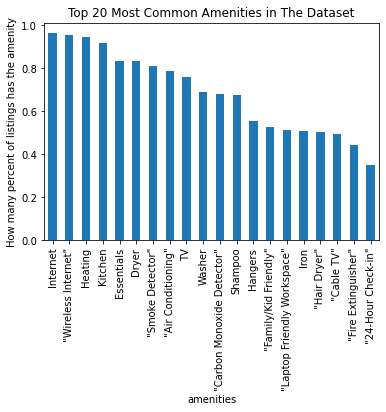

In [31]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_lis['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_lis))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()


# Question 2.1: How do amenities attract bookings?
Here we want to see the impact of amenities on future bookings, based on the Availability in the next 30 days, which we will use as an indicator of property popularity.



In [32]:
#Check if amenities column has an missing values.
df_lis['amenities'].isnull().sum()

0

In [33]:
#Here I create new columns for each of the amenities and fill them all with zeros.
for i in range(len(list_of_amenities)):
    df_lis[list_of_amenities[i]] = 0

In [34]:
#Fill the new amenities columns
#First code checks if the listing has given amenity
#If the listing has that amenity, fill it with 1 
#If it does not have it, fill it with 0
for i in range(len(list_of_amenities)):
    for t in range(len(df_lis)):
        if list_of_amenities[i] in df_lis['amenities'][t]:
            df_lis.loc[t , list_of_amenities[i]] = 1
        else:
            df_lis.loc[t , list_of_amenities[i]] = 0
        

In [35]:
#Create dataframe that will contain information about booking percentage of listings having the given amenity
amenities_importance = pd.DataFrame(index=range(0,len(list_of_amenities)), columns = ["Amenity_Name", "Booking Ratio for HAVING the Amenity", "Booking Ratio for NOT HAVING the Amenity", "Booking Difference"])


#In the below for loop:
#write the name of the amenity, calculate the booking percentage of listings that contain the given amenitiy
#calculate the booking ratio of listings that do not contain the amenitiy
#calculate the difference between booking percentages for each given amenity. 
for i in range(len(list_of_amenities)):
    amenities_importance['Amenity_Name'][i] = list_of_amenities[i]
    amenities_importance['Booking Ratio for HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_percentage_30'].mean()[1]
    amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_percentage_30'].mean()[0]
    amenities_importance['Booking Difference'][i] = amenities_importance['Booking Ratio for HAVING the Amenity'][i] - amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i]

amenities_importance.set_index('Amenity_Name', inplace=True)

In [36]:
#Top 10 booking differences to see which amenities attract more bookings
amenities_importance.sort_values(by='Booking Difference', ascending = False)[:10]

,Booking Ratio for HAVING the Amenity,Booking Ratio for NOT HAVING the Amenity,Booking Difference
Amenity_Name,,,
"""Smoke Detector""",0.741028,0.584866,0.156162
"""translation missing: en.hosting_amenity_49""",0.777402,0.702377,0.0750252
"""Buzzer/Wireless Intercom""",0.762376,0.696176,0.0661996
"""Fire Extinguisher""",0.748335,0.682709,0.0656262
"""Carbon Monoxide Detector""",0.731791,0.668679,0.063112
"""Wireless Internet""",0.714362,0.655488,0.0588745
"""Hot Tub""",0.763872,0.709118,0.0547539
"""Other pet(s)""",0.760417,0.71145,0.0489662
"""Lock on Bedroom Door""",0.752602,0.705432,0.0471696


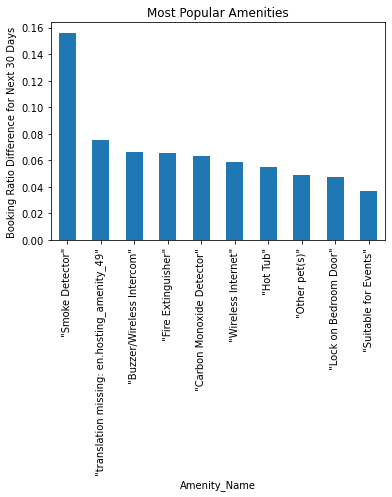

[]

In [37]:
#Here I draw a bar chart to visualize which amenities are most prefered by guests.
amenities_importance['Booking Difference'].sort_values(ascending = False)[:10].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()
list()

What we found is that a smoke detector increases the booking percentage for next 30 days almost by 15%.
Also having a Buzzer/Wireless Intercom, "Fire Extinguisher, "Wireless Internet" and Lock on Bedroom Door are good 
ideas for increasing the popularity for a listing.

 # Question 3: Can we build a model to predict the price of a listing based on the most influencial features of the dataset?
There are many features in the dataset that have effect on the price of the listing. 
In the third question I would like to train a model to estimate the price of a listing. 

So the question I would like to answer is: Can we build a model that predicts property price based on the most  common and booking-attracting features of the listings?


  

In [38]:
#First I would like to know about the number of missing values in the features that are related to price.
print(df_lis['price'].isnull().sum())
print(df_lis['weekly_price'].isnull().sum())
print(df_lis['monthly_price'].isnull().sum())
print(df_lis['security_deposit'].isnull().sum())
print(df_lis['cleaning_fee'].isnull().sum())

0
2693
2697
2243
1107


#There are five different prices in the dataset, which are listed below.

price
weekly_price
monthly_price
security_deposit
cleaning_fee

In the code cell above, I find a number of missing values in each column. As can be seen, the majority of the listings do not have weekly or monthly price. So we will model using the "price" variable because of larger sample size.

In [39]:
list(list_of_amenities)

['"Cable TV"',
 '"Washer / Dryer"',
 '"Fire Extinguisher"',
 '"24-Hour Check-in"',
 '"Buzzer/Wireless Intercom"',
 'Breakfast',
 '"Safety Card"',
 '"Air Conditioning"',
 'Cat(s)',
 '"Laptop Friendly Workspace"',
 'Pool',
 'Kitchen',
 '"Elevator in Building"',
 '"Wireless Internet"',
 'Heating',
 '"Indoor Fireplace"',
 '"First Aid Kit"',
 '"translation missing: en.hosting_amenity_49"',
 '"Hot Tub"',
 '"Wheelchair Accessible"',
 '"Smoking Allowed"',
 'Iron',
 '"Hair Dryer"',
 '"translation missing: en.hosting_amenity_50"',
 '"Lock on Bedroom Door"',
 'Dryer',
 '"Free Parking on Premises"',
 '"Smoke Detector"',
 '"Suitable for Events"',
 'Gym',
 '"Other pet(s)"',
 'Dog(s)',
 '"Family/Kid Friendly"',
 'Internet',
 '"Pets live on this property"',
 '"Paid Parking Off Premises"',
 '"Free Parking on Street"',
 'Doorman',
 'Hangers',
 'TV',
 'Essentials',
 '"Carbon Monoxide Detector"',
 '"Pets Allowed"',
 'Shampoo',
 'Washer']

In [40]:
#Check if amenities column has an missing values.
df_lis['amenities'].isnull().sum()

0

In [41]:
#Here I create new columns for each of the amenities and fill them all with zeros.
for i in range(len(list_of_amenities)):
    df_lis[list_of_amenities[i]] = 0

In [42]:
#Here I fill the new amenities columns, by first checking if the listing has that amenity.
#If the listing has that amenity I fill it with 1 and if it does not have it, I fill it with zero.
for i in range(len(list_of_amenities)):
    for t in range(len(df_lis)):
        if list_of_amenities[i] in df_lis['amenities'][t]:
            df_lis.loc[t , list_of_amenities[i]] = 1
        else:
            df_lis.loc[t , list_of_amenities[i]] = 0

Below, I made a list of features of interest (FOI) that in my opinion are crucial for estimating the price of a listing. The FOIs are some of the columns form the original dataset along with some of the new columns with categorical values created from the amenities. 

I creted a sub-dataframe of listings dataframe. 

In [43]:
#Below, I made a list of important features in my opinion for estimating the price of a listing and created
#a sub-dataframe of listings dataframe.

#In order to answer the first question, I made columns for amenities categorical value, I will use all amenities columns
#I created there.
features_of_interest = [                  

'Internet',
'"Wireless Internet"',
'Heating',
'Kitchen',
'Essentials',
'Dryer',
'"Smoke Detector"',
'TV',
'Washer',
'"Air Conditioning"',
'Shampoo',    
'"Carbon Monoxide Detector"',
'Hangers',
'"Family/Kid Friendly"',
'"Laptop Friendly Workspace"',
'Iron',
'"Hair Dryer"',
'"Cable TV"',
'"Fire Extinguisher"',
'"24-Hour Check-in"',
'longitude',
'host_has_profile_pic',
'accommodates',
'host_is_superhost',
'room_type',
'bed_type',
'host_identity_verified',
'latitude',
'instant_bookable',
'"Hot Tub"',
'extra_people',
'square_feet',
'number_of_reviews',
'cleaning_fee', 
'host_acceptance_rate',
'security_deposit',
'host_neighbourhood',
'review_scores_rating',
'zipcode',
'calculated_host_listings_count',
'accommodates',
'guests_included',
'property_type',
'bathrooms',
'beds',
'review_scores_value',
'review_scores_location',           
'review_scores_cleanliness',             
'review_scores_checkin',                  
'review_scores_accuracy',                
'review_scores_communication',           
'bedrooms',                            
'bed_type',                              
'host_response_time',                   
'cancellation_policy',
'room_type',                             
'host_is_superhost',                      
'host_has_profile_pic',                
'host_identity_verified',
'instant_bookable',
'host_response_rate',
'price'
]


df_lis_ml = df_lis[features_of_interest]

In [44]:
# provide a set of columns that have NO MISSING values -> so they can predict better 
no_nulls = set(df_lis.columns[np.sum(df_lis.isnull()) == 0])
print(no_nulls)

{'experiences_offered', '"Fire Extinguisher"', '"24-Hour Check-in"', '"Buzzer/Wireless Intercom"', '"Air Conditioning"', 'Cat(s)', 'Pool', 'listing_url', 'id', 'availability_60', '"translation missing: en.hosting_amenity_49"', 'host_identity_verified', 'instant_bookable', 'street', 'host_has_profile_pic', 'Iron', 'calculated_host_listings_count', '"Suitable for Events"', 'Gym', 'Dog(s)', 'Internet', 'calendar_last_scraped', 'bed_type', '"Pets live on this property"', 'number_of_reviews', 'Essentials', '"Cable TV"', 'Washer', 'latitude', 'guests_included', '"Safety Card"', '"Laptop Friendly Workspace"', 'Kitchen', '"Wireless Internet"', 'description', 'booking_percentage_30', 'availability_30', '"Smoking Allowed"', 'host_is_superhost', '"Smoke Detector"', 'host_url', 'host_since', 'require_guest_phone_verification', 'Doorman', 'country_code', 'extra_people', 'room_type', '"Elevator in Building"', 'last_scraped', '"Indoor Fireplace"', '"Wheelchair Accessible"', 'host_verifications', 'Dry

In [45]:
#Now lets check the missing values in each columns and find the right way to imput them.
df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

square_feet                    3529
cleaning_fee                   1107
host_acceptance_rate            471
security_deposit               2243
host_neighbourhood              339
review_scores_rating            813
zipcode                          38
property_type                     3
bathrooms                        14
beds                              9
review_scores_value             821
review_scores_location          822
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_accuracy          823
review_scores_communication     818
bedrooms                         10
host_response_time              471
host_response_rate              471
dtype: int64

In [46]:
#Since there is a missing values for each listing, I will drop the 'square_feet' column. 
#Columns like beds, bedrooms and bathrooms columns can be good indicators of property size.

df_lis_ml = df_lis_ml.drop(columns='square_feet')
df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

cleaning_fee                   1107
host_acceptance_rate            471
security_deposit               2243
host_neighbourhood              339
review_scores_rating            813
zipcode                          38
property_type                     3
bathrooms                        14
beds                              9
review_scores_value             821
review_scores_location          822
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_accuracy          823
review_scores_communication     818
bedrooms                         10
host_response_time              471
host_response_rate              471
dtype: int64

In [47]:
#host response rate imput NaN with mean and convert it to float
df_lis_ml['host_response_rate'] = df_lis_ml['host_response_rate'].str.replace('%', '')
df_lis_ml['host_response_rate'] = df_lis_ml['host_response_rate'].astype(float)
df_lis_ml['host_response_rate'].mean()
df_lis_ml['host_response_rate'] = df_lis_ml['host_response_rate'].fillna((df_lis_ml['host_response_rate'].mean()))
df_lis_ml.host_response_rate


0        94.989082
1       100.000000
2       100.000000
3       100.000000
4       100.000000
           ...    
3580     96.000000
3581     10.000000
3582     78.000000
3583    100.000000
3584    100.000000
Name: host_response_rate, Length: 3585, dtype: float64

In [48]:
##bathrooms imput NaN with mean
df_lis_ml['bathrooms'].mean()
df_lis_ml['bathrooms'] = df_lis_ml['bathrooms'].fillna((df_lis_ml['bathrooms'].mean()))
df_lis_ml.bathrooms

0       1.5
1       1.0
2       1.0
3       1.0
4       1.5
       ... 
3580    1.0
3581    1.0
3582    1.0
3583    1.0
3584    1.0
Name: bathrooms, Length: 3585, dtype: float64

In [49]:
##beds imput NaN with mean
df_lis_ml['beds'].mean()
df_lis_ml['beds'] = df_lis_ml['beds'].fillna((df_lis_ml['beds'].mean()))
df_lis_ml.beds

0       3.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
3580    1.0
3581    1.0
3582    1.0
3583    1.0
3584    1.0
Name: beds, Length: 3585, dtype: float64

In [50]:
##bedrooms imput NaN with mean
df_lis_ml['bedrooms'].mean()
df_lis_ml['bedrooms'] = df_lis_ml['bedrooms'].fillna((df_lis_ml['bedrooms'].mean()))
df_lis_ml.bedrooms

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3580    1.0
3581    1.0
3582    1.0
3583    1.0
3584    1.0
Name: bedrooms, Length: 3585, dtype: float64

In [51]:
#property type NaN fill with the mode 
df_lis_ml['property_type'].mode()
df_lis_ml['property_type'] = df_lis_ml['property_type'].fillna((df_lis_ml['property_type'].mode()[0]))
df_lis_ml.property_type

0           House
1       Apartment
2       Apartment
3           House
4           House
          ...    
3580    Apartment
3581    Apartment
3582    Apartment
3583    Apartment
3584    Apartment
Name: property_type, Length: 3585, dtype: object

In [52]:
# Because security deposit = NaN very likley means that it is not required
#I will fill security_deposit NaN with 0 and convert them to float
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace('$', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace(',', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].astype(float)
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].fillna(0)

In [53]:
#Because cleaning_fee = NaN very likley means that there is not extra charge for cleaning
#I will fill cleaning_fee NaN with 0 and convert them to float
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace('$', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].fillna(0)
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].astype(float)
df_lis_ml.cleaning_fee

0       35.0
1       10.0
2        0.0
3       50.0
4       15.0
        ... 
3580     0.0
3581    15.0
3582     0.0
3583     0.0
3584    25.0
Name: cleaning_fee, Length: 3585, dtype: float64

In [54]:
#Fill acceptance rate NaN with the mean and convert it to float
df_lis_ml['host_acceptance_rate'] = df_lis_ml['host_acceptance_rate'].str.replace('%', '')
df_lis_ml['host_acceptance_rate'] = df_lis_ml['host_acceptance_rate'].astype(float)
df_lis_ml['host_acceptance_rate'].mean()
df_lis_ml['host_acceptance_rate'] = df_lis_ml['host_acceptance_rate'].fillna((df_lis_ml['host_acceptance_rate'].mean()))
df_lis_ml.host_acceptance_rate

0        84.173089
1       100.000000
2        88.000000
3        50.000000
4       100.000000
           ...    
3580    100.000000
3581     83.000000
3582     50.000000
3583     96.000000
3584     95.000000
Name: host_acceptance_rate, Length: 3585, dtype: float64

In [55]:
#acceptance rate NaN with the mode
df_lis_ml['zipcode'].mode()
df_lis_ml['zipcode'] = df_lis_ml['zipcode'].fillna((df_lis_ml['zipcode'].mode()[0]))

In [56]:
#host_neighbourhood NaN with mode
df_lis_ml['host_neighbourhood'].mode()
df_lis_ml['host_neighbourhood'] = df_lis_ml['host_neighbourhood'].fillna((df_lis_ml['host_neighbourhood'].mode()[0]))

In [57]:
#host_neighbourhood NaN with mode
df_lis_ml['host_response_time'].mode()
df_lis_ml['host_response_time'] = df_lis_ml['host_response_time'].fillna((df_lis_ml['host_response_time'].mode()[0]))
df_lis_ml.host_response_time


0           within an hour
1           within an hour
2       within a few hours
3       within a few hours
4           within an hour
               ...        
3580        within an hour
3581    a few days or more
3582          within a day
3583        within an hour
3584        within an hour
Name: host_response_time, Length: 3585, dtype: object

In [58]:
#The features below have more than 1/3 of missing values, so filling them with means or modes might dilute 
#too much the power of the features
df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

review_scores_rating           813
review_scores_value            821
review_scores_location         822
review_scores_cleanliness      818
review_scores_checkin          820
review_scores_accuracy         823
review_scores_communication    818
dtype: int64

In [59]:
features_of_interest = ['bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'square_feet', 
'reviews_per_month', 'accommodates', 'guests_included', '"24-Hour Check-in"', 
'"Suitable for Events"','"Pets live on this property"', 'Dog(s)', '"Smoking Allowed"',
'"Other pet(s)"', 'Essentials', '"Wireless Internet"',
       '"Buzzer/Wireless Intercom"', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       '"Hot Tub"', '"Air Conditioning"', '"Pets Allowed"', 'Pool',
       '"Hair Dryer"', '"Fire Extinguisher"', 'Breakfast', '"Washer / Dryer"',
       '"Laptop Friendly Workspace"', '"Free Parking on Premises"',
       '"Lock on Bedroom Door"', 'Cat(s)', 'Hangers', '"Family/Kid Friendly"',
       '"Carbon Monoxide Detector"', '"Safety Card"', 'Kitchen',
       '"Elevator in Building"', 'Internet', 'Shampoo', '"Smoke Detector"',
       '"Wheelchair Accessible"', 'Iron', '"First Aid Kit"',
       '"Indoor Fireplace"', '"Cable TV"', 'Heating', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']      

df_lis_ml = df_lis[features_of_interest]

In [60]:
df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
reviews_per_month                756
neighbourhood_group_cleansed    3585
property_type                      3
security_deposit                2243
cleaning_fee                    1107
dtype: int64

In [61]:
#Here I drop the 'square_feet' column since there are many missing values and
#columns like beds, bedrooms and bathrooms columns that can replace the square_feet

df_lis_ml = df_lis_ml.drop(columns='square_feet')
df_lis_ml = df_lis_ml.drop(columns='neighbourhood_group_cleansed')

In [62]:
df_lis_ml['price'] = df_lis_ml['price'].str.replace('$', '')
df_lis_ml['price'] = df_lis_ml['price'].str.replace(' ', '')
df_lis_ml['price'] = df_lis_ml['price'].str.replace(',', '')
df_lis_ml['price'] = df_lis_ml['price'].astype(float)
df_lis_ml.price


0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [63]:
##bathrooms imput NaN with mean
df_lis_ml['bathrooms'].mean()
df_lis_ml['bathrooms'] = df_lis_ml['bathrooms'].fillna((df_lis_ml['bathrooms'].mean()))   

In [64]:
##bedrooms imput NaN with mean
df_lis_ml['bedrooms'].mean()
df_lis_ml['bedrooms'] = df_lis_ml['bedrooms'].fillna((df_lis_ml['bedrooms'].mean())) 

In [65]:
##beds imput NaN with mean
df_lis_ml['beds'].mean()
df_lis_ml['beds'] = df_lis_ml['beds'].fillna((df_lis_ml['beds'].mean())) 

In [66]:
##reviews_per_month imput NaN with mean
df_lis_ml['reviews_per_month'].mean()
df_lis_ml['reviews_per_month'] = df_lis_ml['reviews_per_month'].fillna((df_lis_ml['reviews_per_month'].mean())) 

In [67]:
#property type rate NaN with the mode   
df_lis_ml['property_type'].mode()
df_lis_ml['property_type'] = df_lis_ml['property_type'].fillna((df_lis_ml['property_type'].mode()[0]))


In [68]:
#Imput Cleaning fee NaN with 0 
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace('$', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].fillna(0)
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].astype(float)

In [69]:
# Imput security_deposit NaN with 0
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace('$', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace(',', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].fillna(0)
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].astype(float)

In [70]:
#clean the extra people and turn it into float
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace('$', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace(',', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].astype(float)

In [71]:
#now let's check the datatypes
df_lis_ml.dtypes


bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
accommodates                      int64
guests_included                   int64
"24-Hour Check-in"                int64
"Suitable for Events"             int64
"Pets live on this property"      int64
Dog(s)                            int64
"Smoking Allowed"                 int64
"Other pet(s)"                    int64
Essentials                        int64
"Wireless Internet"               int64
"Buzzer/Wireless Intercom"        int64
TV                                int64
Gym                               int64
Washer                            int64
Doorman                           int64
Dryer                             int64
"Hot Tub"                         int64
"Air Conditioning"                int64
"Pets Allowed"                    int64


In [72]:
#creating a new dataframe which is a subset of categorical columns of out df_lis_ml dataframe
cat_cols = df_lis_ml.select_dtypes(include=['object'])

In [73]:
cat_cols.head()


,host_is_superhost,property_type,room_type,bed_type,instant_bookable,cancellation_policy
0,f,House,Entire home/apt,Real Bed,f,moderate
1,f,Apartment,Private room,Real Bed,t,moderate
2,t,Apartment,Private room,Real Bed,f,moderate
3,f,House,Private room,Real Bed,f,moderate
4,t,House,Private room,Real Bed,f,flexible


In [74]:
# Making new columns from categorical variables in order to use these features in ML regression algoritm.
for col in cat_cols:
    try:
        df_lis_ml = pd.concat([df_lis_ml.drop(col, axis=1), pd.get_dummies(df_lis_ml[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

In [75]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [76]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [77]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.22275075483313467


The R squared value of our model is 0.22.
It means that a full 22% of the variation of property price is explained by our model. 

It is important to note that we strictly circled our model features to property type, amenities, location, and we did not take into account many other crucial features such as peak seasons, guests reviews and or host ratings, to name a few. However, our model was still able to account for a fifth of price variations.

In [78]:
#Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model. 
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [79]:
coef_df.head(15)

,est_int,coefs,abs_coefs
3,latitude,511.139487,511.139487
4,longitude,248.313105,248.313105
29,"""Washer / Dryer""",142.230298,142.230298
55,property_type_Camper/RV,-118.546244,118.546244
74,cancellation_policy_super_strict_30,94.283234,94.283234
65,room_type_Private room,-61.032954,61.032954
66,room_type_Shared room,-60.728356,60.728356
20,Doorman,52.814676,52.814676
13,"""Other pet(s)""",-46.946403,46.946403
58,property_type_Entire Floor,-38.703028,38.703028


In [80]:
def find_optimal_number_of_selectors(X, y, k_samples, plot=True):
    '''
    INPUT:
    X dataframe that contains the features.
    y dataframe that contains the variable to be predicted.
    k_samples is a list of k values that will be tested.
    
    OUTPUT:
    A dictionary that contains values of tested k-values as keys and r-squared values for each key.
    The k-value that has the highest r-squared.

    '''   
    result_r_squareds = []
    results = {}
    for kes in k_samples:
        selector = SelectKBest(score_func=f_regression, k=kes)
        selector.fit_transform(X, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X.iloc[:,selected_cols]
        
        X_train, X_test, y_train, y_test = train_test_split(features_new_X, y, test_size = 0.2, random_state=42)
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        result_r_squareds.append(r2_score(y_test, y_test_preds))
        results[str(kes)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(k_samples, result_r_squareds, label="r-squared", alpha=0.5)
        plt.xlabel("Different k_values")
        plt.ylabel("R_Squared_Values")
        plt.legend(loc=1)
        plt.show()
    
    best_k = max(results, key=results.get)
    
    return results, best_k

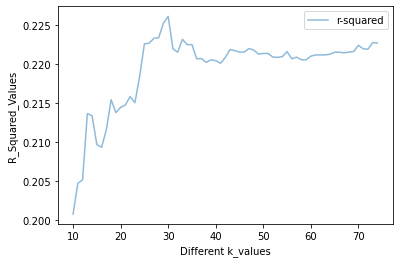

{'10': 0.20078429093784056, '11': 0.20471453157159747, '12': 0.20518427542431716, '13': 0.21366486429287412, '14': 0.21340872238171293, '15': 0.20968726361179868, '16': 0.20936302327296252, '17': 0.2116146469486191, '18': 0.2154652261871668, '19': 0.2138080023815968, '20': 0.21448157879217122, '21': 0.2147897135637835, '22': 0.21586633038549063, '23': 0.21507439605671452, '24': 0.2184687154317676, '25': 0.22264315014043923, '26': 0.22271824532725137, '27': 0.22335056602643222, '28': 0.22341831093562048, '29': 0.22529925125349004, '30': 0.22616947133252008, '31': 0.22198767883814907, '32': 0.22156192071463388, '33': 0.22321884648727097, '34': 0.22253185485356208, '35': 0.2225427392182895, '36': 0.22071761370244725, '37': 0.22074868731252661, '38': 0.22025131647962315, '39': 0.22058684409040874, '40': 0.22048301145092308, '41': 0.22014078002080306, '42': 0.22088232395743967, '43': 0.22191090365214794, '44': 0.22176673940083202, '45': 0.22157245001648573, '46': 0.2215784107209281, '47': 0

In [81]:
#I test a range of k values from 10 to 74 (which is the number of all features)
#and find the number of features that generate the highest r-squared value.
k_samples = range(10, len(X.columns))
emre_results, emre_best_k = find_optimal_number_of_selectors(X, y, k_samples)
print(emre_results)
print(emre_best_k)
print(emre_results[emre_best_k])

## Heatmap
let's make a heatmap




In [82]:
import numpy as np;
import seaborn as sns; 

In [83]:
#heatmap
df_lis_ml.head()
 

,bathrooms,bedrooms,beds,latitude,longitude,reviews_per_month,accommodates,guests_included,"""24-Hour Check-in""","""Suitable for Events""",...,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,1.5,2.0,3.0,42.282619,-71.133068,1.970908,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1.0,1.0,1.0,42.286241,-71.134374,1.300000,2,0,0,0,...,1,0,0,0,0,1,1,1,0,0
2,1.0,1.0,1.0,42.292438,-71.135765,0.470000,2,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1.0,1.0,2.0,42.281106,-71.121021,1.000000,4,2,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1.5,1.0,2.0,42.284512,-71.136258,2.250000,2,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [84]:
list(df_lis_ml)

['bathrooms',
 'bedrooms',
 'beds',
 'latitude',
 'longitude',
 'reviews_per_month',
 'accommodates',
 'guests_included',
 '"24-Hour Check-in"',
 '"Suitable for Events"',
 '"Pets live on this property"',
 'Dog(s)',
 '"Smoking Allowed"',
 '"Other pet(s)"',
 'Essentials',
 '"Wireless Internet"',
 '"Buzzer/Wireless Intercom"',
 'TV',
 'Gym',
 'Washer',
 'Doorman',
 'Dryer',
 '"Hot Tub"',
 '"Air Conditioning"',
 '"Pets Allowed"',
 'Pool',
 '"Hair Dryer"',
 '"Fire Extinguisher"',
 'Breakfast',
 '"Washer / Dryer"',
 '"Laptop Friendly Workspace"',
 '"Free Parking on Premises"',
 '"Lock on Bedroom Door"',
 'Cat(s)',
 'Hangers',
 '"Family/Kid Friendly"',
 '"Carbon Monoxide Detector"',
 '"Safety Card"',
 'Kitchen',
 '"Elevator in Building"',
 'Internet',
 'Shampoo',
 '"Smoke Detector"',
 '"Wheelchair Accessible"',
 'Iron',
 '"First Aid Kit"',
 '"Indoor Fireplace"',
 '"Cable TV"',
 'Heating',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'host_is_superhost_t',
 'property_type_

## Correlation Heatmap  using Seaborn

In [85]:
df_lis_ml 



,bathrooms,bedrooms,beds,latitude,longitude,reviews_per_month,accommodates,guests_included,"""24-Hour Check-in""","""Suitable for Events""",...,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,1.5,2.0,3.0,42.282619,-71.133068,1.970908,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1.0,1.0,1.0,42.286241,-71.134374,1.300000,2,0,0,0,...,1,0,0,0,0,1,1,1,0,0
2,1.0,1.0,1.0,42.292438,-71.135765,0.470000,2,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1.0,1.0,2.0,42.281106,-71.121021,1.000000,4,2,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1.5,1.0,2.0,42.284512,-71.136258,2.250000,2,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,1.0,1.0,1.0,42.380968,-71.083795,0.340000,3,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3581,1.0,1.0,1.0,42.347503,-71.118336,1.970908,2,1,1,0,...,1,0,0,0,0,1,0,0,1,0
3582,1.0,1.0,1.0,42.371771,-71.071300,1.970908,4,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3583,1.0,1.0,1.0,42.385226,-71.080923,2.000000,2,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [86]:
#We select some variables of interest 
df_lis_ml_corr = df_lis_ml[["price", "bathrooms", "bedrooms","beds", "latitude", "longitude","reviews_per_month", "accommodates", 
     "cleaning_fee", "TV", '"Cable TV"','"Indoor Fireplace"', "Kitchen"
                            ]]
df_lis_ml_corr.head()



,price,bathrooms,bedrooms,beds,latitude,longitude,reviews_per_month,accommodates,cleaning_fee,TV,"""Cable TV""","""Indoor Fireplace""",Kitchen
0,250.0,1.5,2.0,3.0,42.282619,-71.133068,1.970908,4,35.0,1,0,0,1
1,65.0,1.0,1.0,1.0,42.286241,-71.134374,1.300000,2,10.0,1,0,0,1
2,65.0,1.0,1.0,1.0,42.292438,-71.135765,0.470000,2,0.0,1,1,0,1
3,75.0,1.0,1.0,2.0,42.281106,-71.121021,1.000000,4,50.0,1,0,1,1
4,79.0,1.5,1.0,2.0,42.284512,-71.136258,2.250000,2,15.0,0,0,0,1


In [87]:
# We plot a correlation table
df_lis_ml_corr.corr()

,price,bathrooms,bedrooms,beds,latitude,longitude,reviews_per_month,accommodates,cleaning_fee,TV,"""Cable TV""","""Indoor Fireplace""",Kitchen
price,1.000000,0.248003,0.385227,0.369777,0.196270,0.165621,-0.106502,0.437756,0.299320,0.248912,0.226981,0.094293,0.095146
bathrooms,0.248003,1.000000,0.430588,0.347531,-0.020697,0.010155,-0.040668,0.346516,0.198076,0.106105,0.112309,0.105964,0.050576
bedrooms,0.385227,0.430588,1.000000,0.710190,-0.045465,0.015719,-0.054535,0.724479,0.295568,0.144091,0.146387,0.105594,0.098699
beds,0.369777,0.347531,0.710190,1.000000,-0.012366,0.033721,-0.000912,0.814681,0.346180,0.155514,0.121252,0.075680,0.097453
latitude,0.196270,-0.020697,-0.045465,-0.012366,1.000000,0.319327,0.044858,0.053818,0.132381,0.086526,0.124433,-0.062357,0.066147
longitude,0.165621,0.010155,0.015719,0.033721,0.319327,1.000000,0.097826,0.083658,0.119139,0.165364,0.138231,0.002927,0.048693
reviews_per_month,-0.106502,-0.040668,-0.054535,-0.000912,0.044858,0.097826,1.000000,0.006869,-0.159490,-0.062764,-0.107246,-0.030409,-0.093547
accommodates,0.437756,0.346516,0.724479,0.814681,0.053818,0.083658,0.006869,1.000000,0.409903,0.257632,0.218294,0.082210,0.141045
cleaning_fee,0.299320,0.198076,0.295568,0.346180,0.132381,0.119139,-0.159490,0.409903,1.000000,0.255508,0.326858,0.019142,0.154012
TV,0.248912,0.106105,0.144091,0.155514,0.086526,0.165364,-0.062764,0.257632,0.255508,1.000000,0.554772,0.086303,0.211503


<AxesSubplot:>

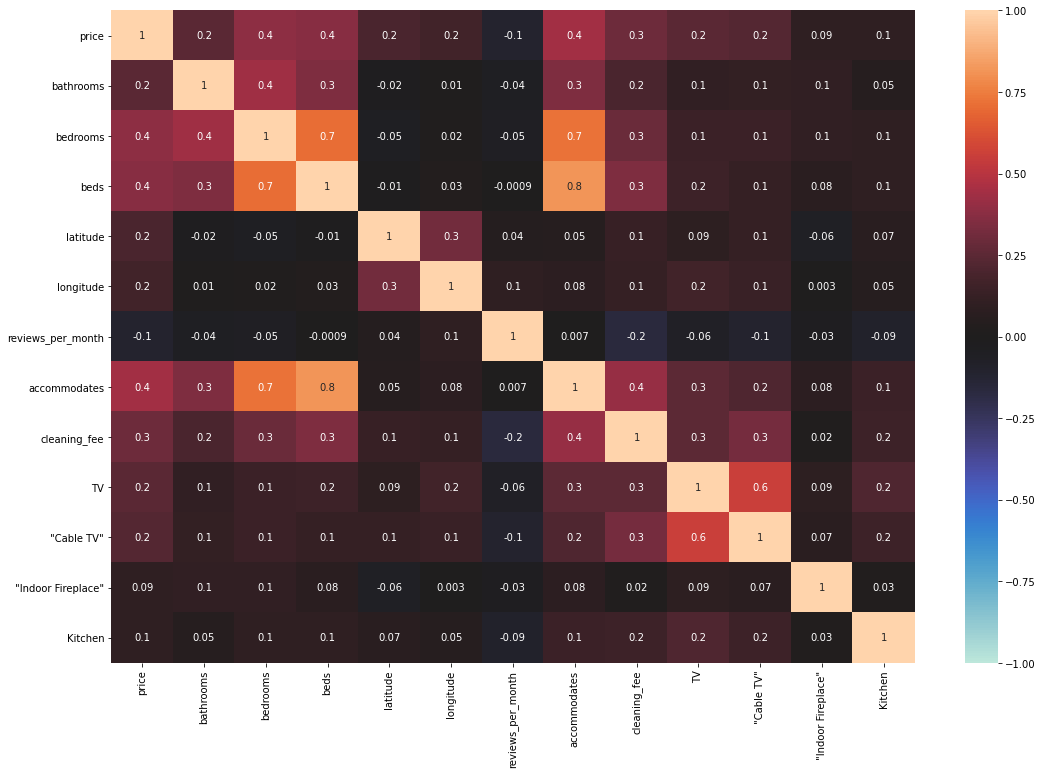

In [88]:
#We create a correlation heatmap centered on 0 wirh a diverging colormap 
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_lis_ml_corr.corr(), 
            annot = True,
            fmt='.1g',
            vmin= -1,
            vmax=1,
            center=0
           #linewidth = 1
           )

# Question 4: How does the price spread based on location — evenly or unevenly?


Since we have seen that latitute and londituge coefficients are important in predicting the price, we would like to see now how does the price spread across Boston neighbourhoods. 

In [89]:
#For the variable price in the original framework, we delete $, spaces and commas, and convert the values to float
df_lis['price'] = df_lis['price'].str.replace('$', '')
df_lis['price'] = df_lis['price'].str.replace(' ', '')
df_lis['price'] = df_lis['price'].str.replace(',', '')
df_lis['price'] = df_lis['price'].astype(float)
df_lis.price

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [90]:
# We check price column descriptives 
df_lis.price.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [91]:
#We check price colum mode
df_lis.price.mode()

0    150.0
dtype: float64

In [92]:
# The mode for property price is $150, the third quartile is $220 and few other properties are listed for 
# more than $220. We scale our price dataset and drop all homes with a price over 220, as outliers will throw 
#off our color coding.

df_lis_map_price = df_lis[df_lis['price'] < 220]

In [93]:
# We create a barchart that plots and compares neighbourhoods based on price
def barchart(df_lis,column,sort_value):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    df_lis_map_price = df_lis.sort_values(by = sort_value)
    sns.barplot(x='neighbourhood', y=column, data = df_lis)
    plt.xlabel(xlabel='Boston Neihbourhoods', fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)

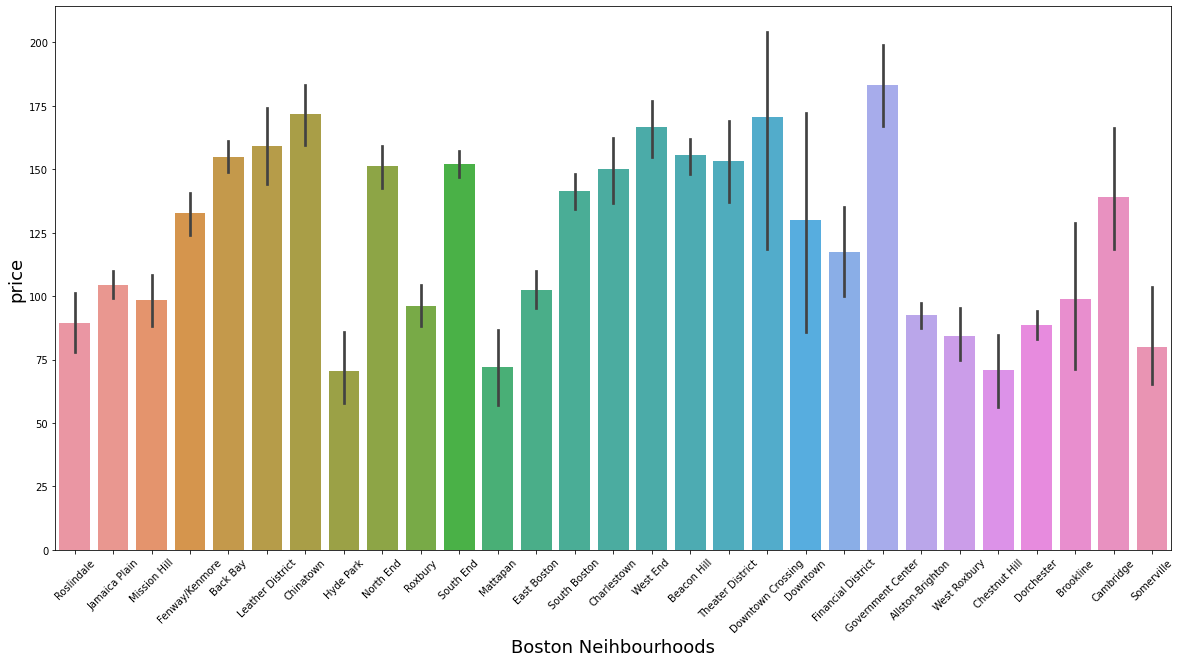

In [94]:

barchart(df_lis_map_price,'price','price')

By looking at the barplot, we deduce that the most pricey neighbourhoods are as follows:
 - Government Center
 - Theater District
 - Chinatown
 - Leather District
 - Back Bay
 - West End
 - Beacon Hill

4.1 We now map property prices on Boston

In [95]:
import matplotlib.pyplot as plt

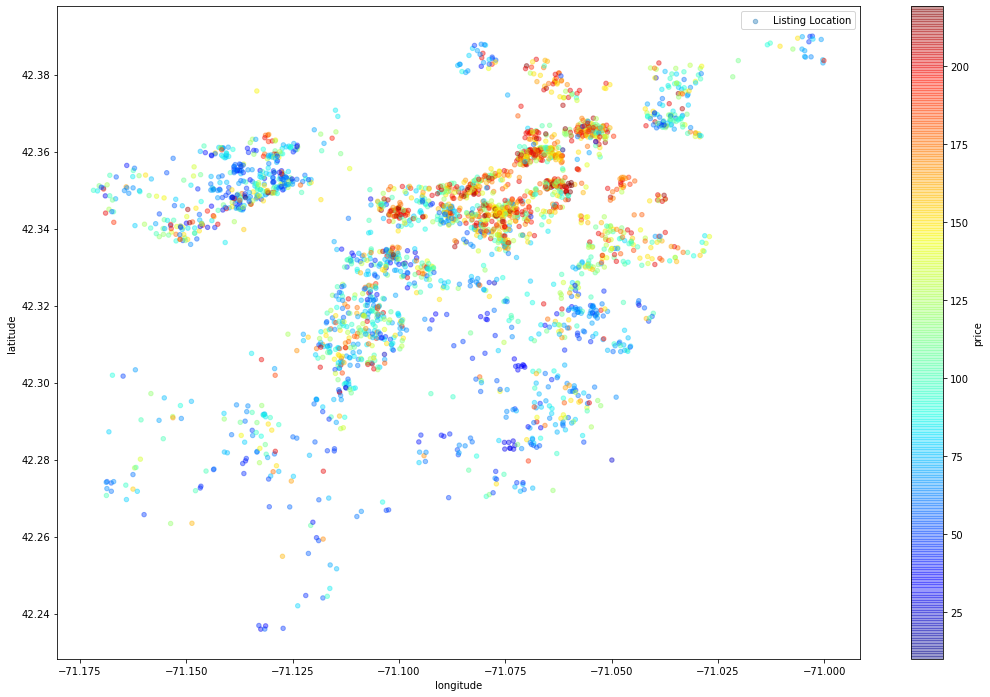

In [96]:
from PIL import Image                                                                                


plt.figure(figsize=(18,12))

ax = plt.gca()
df_lis_map_price.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()


By looking at the map, we can infer that the most pricey properties are mainly clustered around the follow coordinates: 42.36 and - 71.060. However, there are higly priced listings also clustered around 42.36 and -71.150 for instance. 

In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [98]:
df_lis.neighbourhood.value_counts().head(50)

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Brookline               8
Leather District        8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [99]:
##To create a map of the listing location, we will use the ‘longitude’ and ‘latitude’ column.
#But first, we need to check the values within the column
coord = df_lis.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,3585.000000,3585.000000
mean,-71.084818,42.340032
std,0.031565,0.024403
min,-71.171789,42.235942
25%,-71.105083,42.329995
50%,-71.078429,42.345201
75%,-71.062155,42.354685
max,-71.000100,42.389982


In [100]:
import folium
from folium.plugins import HeatMap

map_folium = folium.Map([71.0589,42.3601], zoom_start=11)

HeatMap(df_lis_map_price[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

In order to get a better visualization of how property prices are distributed, I created a Heat Map of Boston. 
More specifically, I used the Folium package (https://pypi.org/project/folium/) to create a map of the listings locations and their relative prices by using the ‘longitude’ and ‘latitude’ information for each property. As we can see, prices do not necessarily evenly spread, as in decreasing, from Boston downtown outwards.  

# Price variation based on proximity from Boston Downtown

In question 5, we determined that the hottest cluster in Boston, price-wise, is located around the following coordinates: 42.36, -71.060. Incidentally, these coordinates closely overlap with the ones of Boston downtown. 
In my previous model, I used latitude and longitude as variables along with and other features. 
Here, I will only use the coordinates of Boston downtown and create a new variable for each listing: "distance form Boston Downtown". 

After calculating the distance from downtown for each property we train the model. The model has an R2 value of 0.23, meaning that 23% of the variation in the prices is explained alone by the distance from Boston downtown. 

In [101]:
def distance_from_Boston_Downtown(lat, lon, downtown=[42.3557, -71.0572]):
    
    R = 6373.0
    lat1 = math.radians(downtown[0])
    lon1 = math.radians(downtown[1])
    lat2 = math.radians(lat)
    lon2 = math.radians(lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [102]:
#Below I make a for look to calculate the distance of each listing from downtown.
#I create a new variable called 'distance_from_downtown' which has the information of distance of listing from downtown. 
for i in range(len(df_lis_ml)):
    df_lis_ml.loc[ i , 'distance_from_Boston_Downtown'] = distance_from_Boston_Downtown(df_lis_ml.loc[ i ,'latitude'] , df_lis_ml.loc[ i ,'longitude'])

In [103]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [104]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [105]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.23030328859772675


Furthermore, the coefficient of determination indicates that distance from downtown has a negative effect on price, meaning as the distance increases, the price decreases. More specifically, for each kilometer distance, the property price drops around 15 USD. 


In [106]:
#Now we check the coefficients of the new regression model.

coef_df = coef_weights(lm_model.coef_, X_train)

In [107]:
#I print the coefficient of 'distance_from_Boston_downtown' variable
coef_df[coef_df['est_int'] == 'distance_from_Boston_Downtown']

,est_int,coefs,abs_coefs
75,distance_from_Boston_Downtown,-15.109444,15.109444
